## 선형판별분석 (LDA)

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 예시 데이터 만들기

In [2]:
# 예시 데이터 생성
np.random.seed(0)
X, y = make_classification(n_samples=200, n_features=2, n_classes=3, n_clusters_per_class=1, n_redundant=0, n_informative=2)

# 데이터 프레임으로 변환
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Class'] = y

# 2. Box's m-test 진행

In [4]:
from scipy.stats import chi2
from scipy.linalg import inv

In [5]:
def box_m_test(data, labels):
    classes = np.unique(labels)
    k = len(classes)
    
    pooled_cov = np.zeros((data.shape[1], data.shape[1]))
    for c in classes:
        class_data = data[labels == c]
        cov_matrix = np.cov(class_data, rowvar=False)
        pooled_cov += (len(class_data) - 1) * cov_matrix

    pooled_cov /= (data.shape[0] - k)

    m_stat = 0
    for c in classes:
        class_data = data[labels == c]
        class_cov = np.cov(class_data, rowvar=False)
        n = len(class_data)
        m_stat += n * np.log(np.linalg.det(class_cov) / np.linalg.det(pooled_cov))
    
    m_stat *= (data.shape[1] - 1) * (data.shape[1] + 1) / 2
    p_value = chi2.sf(m_stat, df=(k - 1) * data.shape[1] * (data.shape[1] + 1) / 2)
    
    return p_value

In [6]:
p_value = box_m_test(X, y)
print(f"Box's M-test p-value: {p_value:.4f}")

Box's M-test p-value: 1.0000


# 3. 선형판별분석 진행

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LDA 수행
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

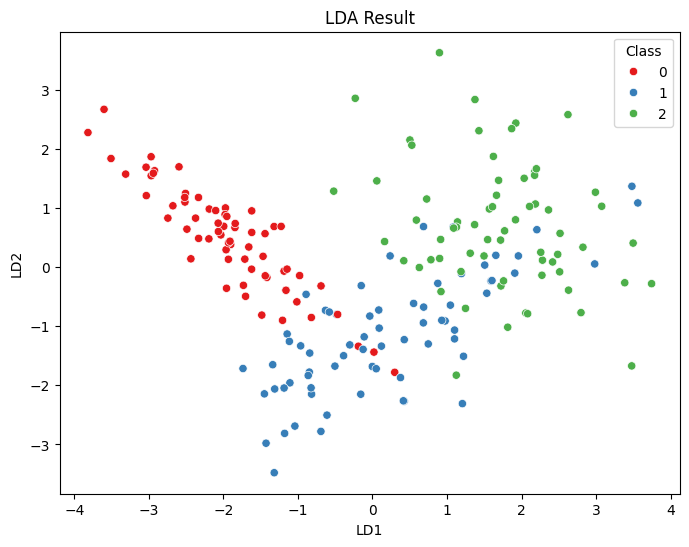

In [8]:
# LDA 결과 시각화
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['Class'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(x='LD1', y='LD2', hue='Class', data=lda_df, palette='Set1')
plt.title('LDA Result')
plt.show()